In [26]:
from dateutil.parser import parse 
import numpy as np
import pandas as pd
import unicodedata
from datetime import datetime
from datetime import date

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.feature_selection import RFE


In [27]:
chosen_feature_predicting = 'rating_count'
chosen_bin_method = 'quartiles'
chosen_success_class = 'movie_class'
chosen_dataset_ratio = 'unbalanced'
chosen_scaling_method = 'None'

In [28]:
moviesDataFileLocation = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\CleaningStage\\stage3FinalProcessedDFBeforeDrop_May-09-2020.csv"

In [29]:
movies_data = pd.read_csv(moviesDataFileLocation)

In [30]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798861 entries, 0 to 798860
Columns: 123 entries, director_ids to Career_Year_Number
dtypes: float64(8), int64(107), object(8)
memory usage: 749.7+ MB


In [31]:
def quartile_bin(df,class_feature='rating_value'):
    # Quartile cut into 4 different buckets

    bin_quartiles = ['terrible','poor','average','excellent']
    cutIntoQuartiles = pd.qcut(df[class_feature].to_list(), q=4,labels=bin_quartiles)
    
    print(cutIntoQuartiles.categories)
    
    df[chosen_success_class] = cutIntoQuartiles
    df[chosen_success_class] = df[chosen_success_class].astype(object)
    print('The shape of our dataset before dropping the class feature is:', df.shape)
#     df.drop(columns = [class_feature] , inplace = True)
    print('The shape of our dataset after dropping the class feature  is:', df.shape)
    return df

In [32]:
def choose_success_measure(df, bin_method = 'Quartiles', feature = 'rating_value'):
    
    # Stats of the feature
    print('\nDescribing the feature : \n')
    print(df[feature].describe())
    

    
    if (bin_method == 'quartiles'):
        # Quartie bin cuts
        df = quartile_bin(df,feature)
            
    elif(bin_method == 'bin_cut'):
        # Bin cuts
        df = bincuts(df,'rating_value')
        
    elif(bin_method == 'Bin_AsPaper'):
        df[chosen_success_class] = df[feature].apply(success_measure).astype('category')
        
        print('\nShape of the dataset : \n')
        print('\nThe shape of our Movies dataset is:', df.shape)
        df.drop(columns = [feature] , inplace = True)
        print('\nThe shape of our Movies dataset is:', df.shape)
    
    print('\nValue Count of the bucketed class is : \n')
    print(df[chosen_success_class].value_counts())

In [33]:
movies_data = movies_data[['director_ids', 'director_names', 'movie_id', 'title',
                           'review_count_user', 'review_count_critic', 'rating_value',
                           'rating_count','birthYear','movie_year','Gender','metascore']]

In [34]:
object_features_to_remove = movies_data.select_dtypes(include = 'object').columns.values.tolist()
object_features_to_remove.remove('Gender')
object_features_to_remove.remove('director_ids')
object_features_to_remove

['director_names', 'movie_id', 'title']

In [35]:
print('The shape of our Movies dataset before removing object type features:', movies_data.shape)
# movies_data = movies_data[movies_data.columns.difference(object_features_to_remove)]
movies_data = movies_data.drop(columns= object_features_to_remove)
print('The shape of our Movies dataset after dropping object type features:', movies_data.shape)

The shape of our Movies dataset before removing object type features: (798861, 12)
The shape of our Movies dataset after dropping object type features: (798861, 9)


In [36]:
movies_data.columns.values

array(['director_ids', 'review_count_user', 'review_count_critic',
       'rating_value', 'rating_count', 'birthYear', 'movie_year',
       'Gender', 'metascore'], dtype=object)

In [37]:
# Script to check the columns that get replaced if we replace on the whole dataframe.

# checkcol = movies_data.select_dtypes(include = object).columns.values
checkcol = movies_data.columns.values

listcolumns = []
countNaNList = []
for i in checkcol:
    count = movies_data[i].isna().sum()
    if movies_data[i].isna().any():
        listcolumns.append(i)
        countNaNList.append(count)
        
columnsWithNaN = tuple(zip(listcolumns, countNaNList))
columnsWithNaN

(('birthYear', 402739), ('metascore', 786139))

In [38]:
movies_data = movies_data.dropna()
movies_data.shape

(8464, 9)

In [39]:
movies_data.to_csv('test_with_all_data.csv',index=False)

In [ ]:
break

In [70]:
choose_success_measure(movies_data , bin_method = chosen_bin_method , feature = chosen_feature_predicting)


Describing the feature : 

count    7.988610e+05
mean     2.044814e+03
std      2.032391e+04
min      5.000000e+00
25%      1.100000e+01
50%      2.900000e+01
75%      1.350000e+02
max      1.741951e+06
Name: rating_count, dtype: float64
Index(['terrible', 'poor', 'average', 'excellent'], dtype='object')
The shape of our dataset before dropping the class feature is: (798861, 7)
The shape of our dataset after dropping the class feature  is: (798861, 7)

Value Count of the bucketed class is : 

terrible     219971
excellent    199712
average      195506
poor         183672
Name: movie_class, dtype: int64


In [114]:
# numericalMovieclass = {"terrible": 100, "poor": 250 , "average": 390, "excellent": 420  }
# movies_data['movie_class'].replace(numericalMovieclass,inplace=True)

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
corr_between_rating_count_metascore = movies_data[['metascore','rating_count']].corr()
sns.heatmap(corr_between_rating_count_metascore, annot=True, cmap=plt.cm.Reds)
plt.show()

KeyError: "['metascore'] not in index"

<Figure size 576x432 with 0 Axes>

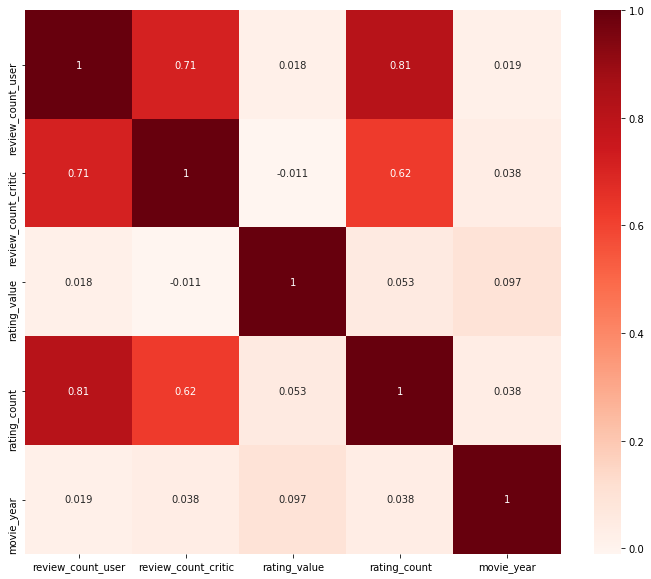

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = movies_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
#Correlation with output variable
cor_target = abs(cor["rating_count"])
print(cor_target)

review_count_user      0.814224
review_count_critic    0.623432
rating_value           0.052981
rating_count           1.000000
movie_year             0.038367
Name: rating_count, dtype: float64


In [53]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

review_count_user      0.814224
review_count_critic    0.623432
rating_count           1.000000
Name: rating_count, dtype: float64

In [54]:
movies_data_new

NameError: name 'movies_data_new' is not defined

In [126]:
## Optimum number of features

movies_data_new = movies_data.sample(1000,random_state = 42)
movies_data_new.shape

X = movies_data_new.drop(columns=["Gender","movie_class"], axis='columns')   #Feature Matrix
y = movies_data_new["Gender"]          #Target Variable

#no of features
nof_list=np.arange(1,len(movies_data_new.columns))            
high_score=0

#Variable to store the optimum features
nof=0
score_list =[]

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    # Training the model
    svclassifier = SVC(kernel='linear')
    rfe = RFE(svclassifier,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    svclassifier.fit(X_train_rfe,y_train)
    score = svclassifier.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.833333
